# Explanatory Data Analysis & Data Presentation (Movies Dataset)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
pd.options.display.max_columns = 30
pd.options.display.float_format = '{:.2f}'.format

## Data Import and first Inspection

__Some attributes from the dataset__:

* **id:** The ID of the movie (clear/unique identifier).
* **title:** The Official Title of the movie.
* **tagline:** The tagline of the movie.
* **release_date:** Theatrical Release Date of the movie.
* **genres:** Genres associated with the movie.
* **belongs_to_collection:** Gives information on the movie series/franchise the particular film belongs to.
* **original_language:** The language in which the movie was originally shot in.
* **budget_musd:** The budget of the movie in million dollars.
* **revenue_musd:** The total revenue of the movie in million dollars.
* **production_companies:** Production companies involved with the making of the movie.
* **production_countries:** Countries where the movie was shot/produced in.
* **vote_count:** The number of votes by users, as counted by TMDB.
* **vote_average:** The average rating of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **runtime:** The runtime of the movie in minutes.
* **overview:** A brief blurb of the movie.
* **spoken_languages:** Spoken languages in the film.
* **poster_path:** The URL of the poster image.
* **cast:** (Main) Actors appearing in the movie.
* **cast_size:** number of Actors appearing in the movie.
* **director:** Director of the movie.
* **crew_size:** Size of the film crew (incl. director, excl. actors).

In [33]:
df = pd.read_csv('movies_complete.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44691 non-null  int64  
 1   title                  44691 non-null  object 
 2   tagline                20284 non-null  object 
 3   release_date           44657 non-null  object 
 4   genres                 42586 non-null  object 
 5   belongs_to_collection  4463 non-null   object 
 6   original_language      44681 non-null  object 
 7   budget_musd            8854 non-null   float64
 8   revenue_musd           7385 non-null   float64
 9   production_companies   33356 non-null  object 
 10  production_countries   38835 non-null  object 
 11  vote_count             44691 non-null  float64
 12  vote_average           42077 non-null  float64
 13  popularity             44691 non-null  float64
 14  runtime                43179 non-null  float64
 15  ov

In [48]:
df[:2]

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,production_countries,vote_count,vote_average,popularity,runtime,overview,spoken_languages,poster_path,cast,cast_size,crew_size,director
0,862,Toy Story,NaN,1995-10-30,Animation|Comedy|Family,Toy Story Collection,en,30.00,373.55,Pixar Animation Studios,United States of America,5415.00,7.70,21.95,81.00,"Led by Woody, Andy's toys live happily in his ...",English,<img src='http://image.tmdb.org/t/p/w185//uXDf...,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,13,106,John Lasseter
1,8844,Jumanji,Roll the dice and unleash the excitement!,1995-12-15,Adventure|Fantasy|Family,NaN,en,65.00,262.80,TriStar Pictures|Teitler Film|Interscope Commu...,United States of America,2413.00,6.90,17.02,104.00,When siblings Judy and Peter discover an encha...,English|Français,<img src='http://image.tmdb.org/t/p/w185//vgpX...,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,26,16,Joe Johnston


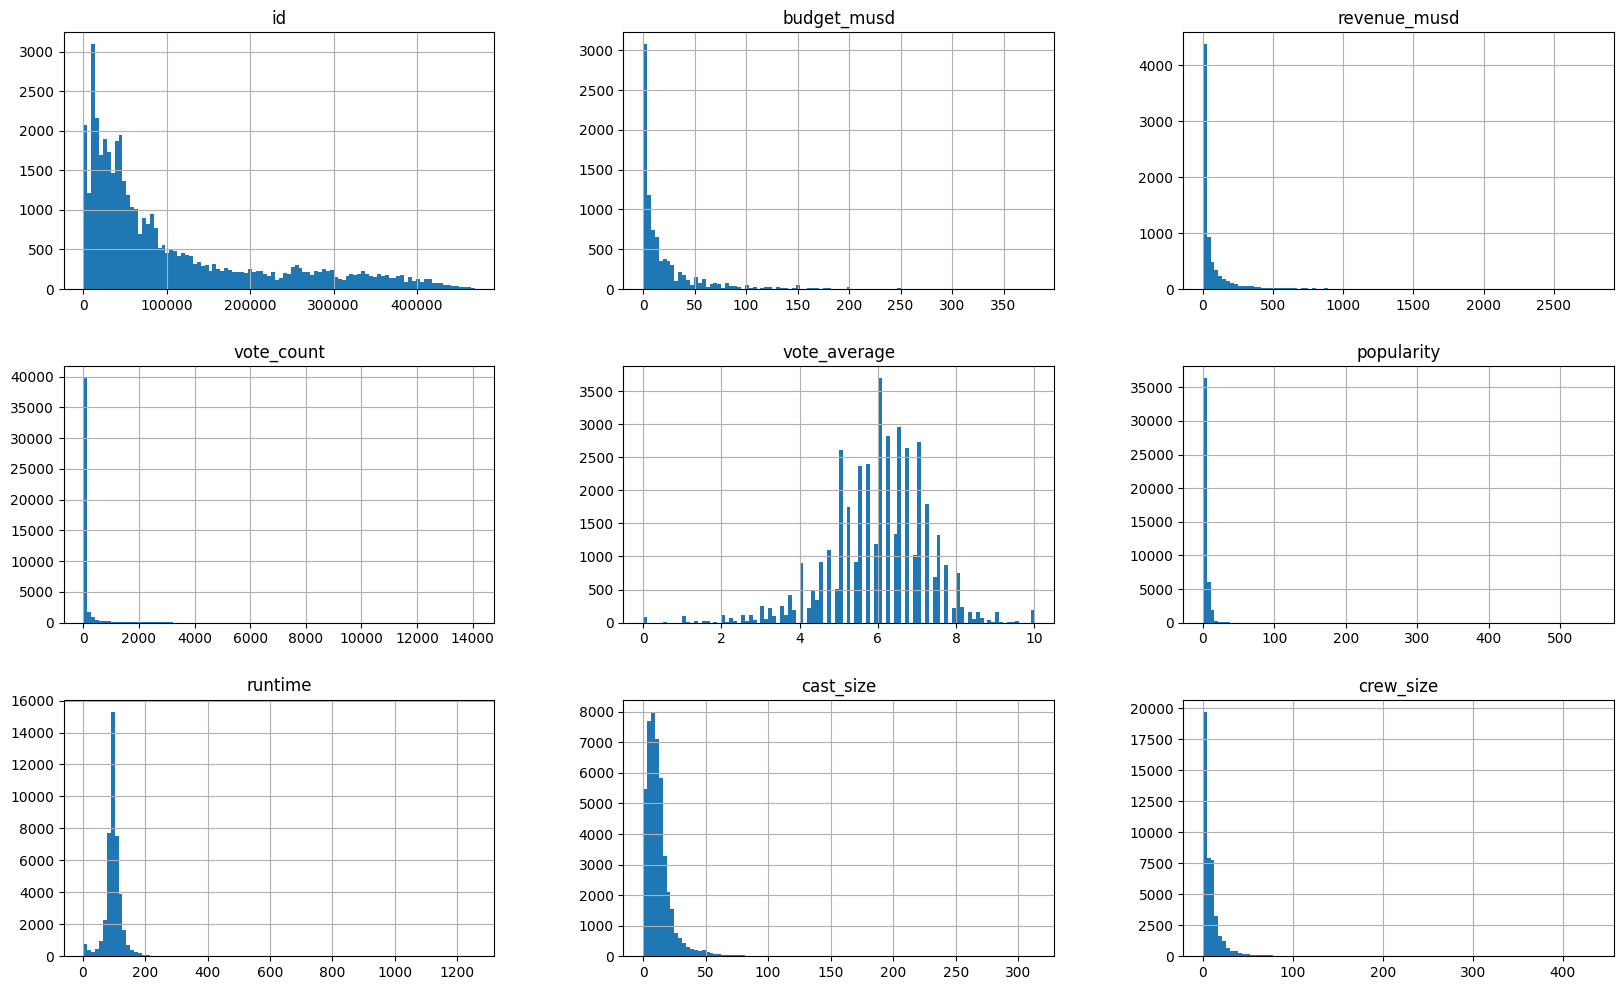

In [35]:
df.hist(figsize=(20,12), bins=100)
plt.show()

- Check the most common movie genres

Drama                   4935
Comedy                  3581
Documentary             2670
Drama|Romance           1291
Comedy|Drama            1125
Horror                   962
Comedy|Romance           921
Comedy|Drama|Romance     591
Drama|Comedy             528
Horror|Thriller          527
Name: genres, dtype: int64


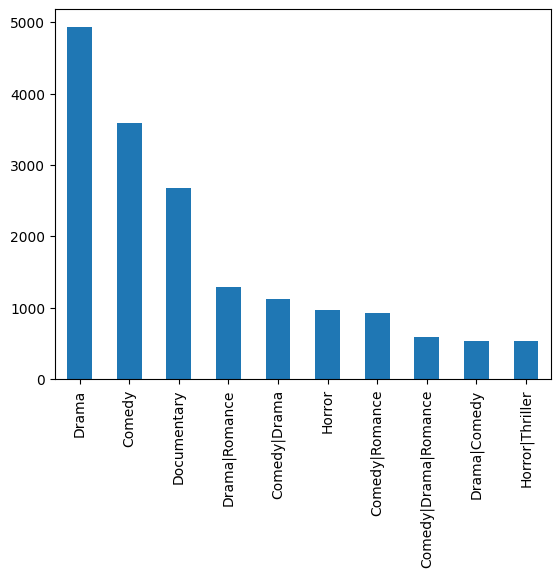

In [36]:
print(df.genres.value_counts().head(10))

df.genres.value_counts().head(10).plot(kind='bar')
plt.show()

- Check the most common movie title

Cinderella              11
Alice in Wonderland      9
Hamlet                   9
Beauty and the Beast     8
Les Misérables           8
The Three Musketeers     7
A Christmas Carol        7
Treasure Island          7
Home                     6
Jane Eyre                6
Name: title, dtype: int64


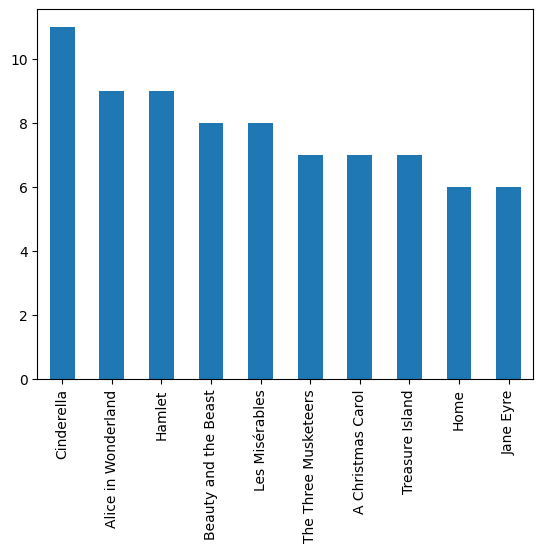

In [37]:
print(df.title.value_counts().head(10))

df.title.value_counts().head(10).plot(kind='bar')
plt.show()

## The best and the worst movies...

__Filter__ the Dataset and __find the best/worst n Movies__ with the

- Highest Revenue
- Highest Budget
- Highest Profit (=Revenue - Budget)
- Lowest Profit (=Revenue - Budget)
- Highest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10) 
- Lowest Return on Investment (=Revenue / Budget) (only movies with Budget >= 10)
- Highest number of Votes
- Highest Rating (only movies with 50 or more Ratings)
- Lowest Rating (only movies with 50 or more Ratings)
- Highest Popularity

__Create a new DataFrame to get all the data that is gonna be useful to us__

        Use HTML object to show movie's poster picture

In [49]:
df_best = df[['poster_path', 'title', 'budget_musd', 'revenue_musd', 'vote_count', 'vote_average', 'popularity']].copy()

HTML(df_best[:2].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
0,,Toy Story,30.00,373.55,5415.00,7.70,21.95
1,,Jumanji,65.00,262.80,2413.00,6.90,17.02


__Movies Top 5 - Highest Revenue__

In [50]:
HTML(df_best.sort_values(by='revenue_musd', ascending=False)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
14448,,Avatar,237.00,2787.97,12114.00,7.20,185.07
26265,,Star Wars: The Force Awakens,245.00,2068.22,7993.00,7.50,31.63
1620,,Titanic,200.00,1845.03,7770.00,7.50,26.89
17669,,The Avengers,220.00,1519.56,12000.00,7.40,89.89
24812,,Jurassic World,150.00,1513.53,8842.00,6.50,32.79


__Movies Top 5 - Highest Budget__

In [51]:
HTML(df_best.sort_values(by='budget_musd', ascending=False)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity
16986,,Pirates of the Caribbean: On Stranger Tides,380.00,1045.71,5068.00,6.40,27.89
11743,,Pirates of the Caribbean: At World's End,300.00,961.00,4627.00,6.90,31.36
26268,,Avengers: Age of Ultron,280.00,1405.40,6908.00,7.30,37.38
10985,,Superman Returns,270.00,391.08,1429.00,5.40,13.28
18517,,John Carter,260.00,284.14,2170.00,6.10,14.67


__Movies Top 5 - Highest Profit__

In [52]:
df_best['profit_musd'] = df_best['revenue_musd'] - df_best['budget_musd']
HTML(df_best.sort_values(by='profit_musd', ascending=False)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd
14448,,Avatar,237.00,2787.97,12114.00,7.20,185.07,2550.97
26265,,Star Wars: The Force Awakens,245.00,2068.22,7993.00,7.50,31.63,1823.22
1620,,Titanic,200.00,1845.03,7770.00,7.50,26.89,1645.03
24812,,Jurassic World,150.00,1513.53,8842.00,6.50,32.79,1363.53
28501,,Furious 7,190.00,1506.25,4253.00,7.30,27.28,1316.25


__Movies Top 5 - Lowest Profit__

In [53]:
HTML(df_best.sort_values(by='profit_musd', ascending=True)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd
20959,,The Lone Ranger,255.00,89.29,2361.00,5.90,12.73,-165.71
7164,,The Alamo,145.00,25.82,108.00,5.80,12.24,-119.18
16659,,Mars Needs Moms,150.00,38.99,202.00,5.60,7.25,-111.01
43611,,Valerian and the City of a Thousand Planets,197.47,90.02,905.00,6.70,15.26,-107.45
2684,,The 13th Warrior,160.00,61.70,524.00,6.40,10.31,-98.30


__Movies Top 5 - Highest ROI__

In [54]:
df_best['ROI'] = df_best['revenue_musd'] / df_best['budget_musd']
HTML(df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_28140\894853125.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HTML(df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].to_html(escape=False))


,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
1055,,E.T. the Extra-Terrestrial,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
255,,Star Wars,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
588,,Pretty Woman,14.00,463.00,1807.00,7.00,13.35,449.00,33.07
18300,,The Intouchables,13.00,426.48,5410.00,8.20,16.09,413.48,32.81
1144,,The Empire Strikes Back,18.00,538.40,5998.00,8.20,19.47,520.40,29.91


__Movies Top 5 - Lowest ROI__

In [44]:
HTML(df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_28140\275354051.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HTML(df_best.sort_values(by='ROI', ascending=False)[df_best.budget_musd >= 10][:5].to_html(escape=False))


,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
1055,,E.T. the Extra-Terrestrial,10.50,792.97,3359.00,7.30,19.36,782.47,75.52
255,,Star Wars,11.00,775.40,6778.00,8.10,42.15,764.40,70.49
588,,Pretty Woman,14.00,463.00,1807.00,7.00,13.35,449.00,33.07
18300,,The Intouchables,13.00,426.48,5410.00,8.20,16.09,413.48,32.81
1144,,The Empire Strikes Back,18.00,538.40,5998.00,8.20,19.47,520.40,29.91


__Movies Top 5 - Most Votes__

In [57]:
HTML(df_best.sort_values(by='vote_count', ascending=False)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
15368,,Inception,160.00,825.53,14075.00,8.10,29.11,665.53,5.16
12396,,The Dark Knight,185.00,1004.56,12269.00,8.30,123.17,819.56,5.43
14448,,Avatar,237.00,2787.97,12114.00,7.20,185.07,2550.97,11.76
17669,,The Avengers,220.00,1519.56,12000.00,7.40,89.89,1299.56,6.91
26272,,Deadpool,58.00,783.11,11444.00,7.40,187.86,725.11,13.50


__Movies Top 5 - Highest Rating__

In [63]:
HTML(df_best.sort_values(by='vote_average', ascending=False)[df_best.vote_count>=50][:5].to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_28140\308859526.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HTML(df_best.sort_values(by='vote_average', ascending=False)[df_best.vote_count>=50][:5].to_html(escape=False))


,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
42626,,Planet Earth II,NaN,NaN,50.00,9.50,5.65,NaN,NaN
10233,,Dilwale Dulhania Le Jayenge,13.20,100.00,661.00,9.10,34.46,86.80,7.58
38503,,Planet Earth,NaN,NaN,176.00,8.80,4.50,NaN,NaN
7578,,Sansho the Bailiff,NaN,NaN,68.00,8.70,5.10,NaN,NaN
28846,,The Jinx: The Life and Deaths of Robert Durst,NaN,NaN,85.00,8.60,5.40,NaN,NaN


__Movies Top 5 - Lowest Rating__

In [64]:
HTML(df_best.sort_values(by='popularity', ascending=True)[df_best.vote_count>=50][:5].to_html(escape=False))

C:\Users\Andre\AppData\Local\Temp\ipykernel_28140\1575089923.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HTML(df_best.sort_values(by='popularity', ascending=True)[df_best.vote_count>=50][:5].to_html(escape=False))


,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
25437,,Hotarubi no Mori e,NaN,NaN,105.00,8.00,0.01,NaN,NaN
5508,,Grave of the Fireflies,3.70,NaN,974.00,8.20,0.01,NaN,NaN
42589,,L'allenatore nel pallone,NaN,NaN,64.00,6.60,0.14,NaN,NaN
22620,,Omar,NaN,NaN,59.00,7.10,0.19,NaN,NaN
22082,,Odds and Evens,NaN,NaN,77.00,7.00,0.19,NaN,NaN


__Movies Top 5 - Most Popular__

In [66]:
HTML(df_best.sort_values(by='popularity', ascending=False)[:5].to_html(escape=False))

,poster_path,title,budget_musd,revenue_musd,vote_count,vote_average,popularity,profit_musd,ROI
30330,,Minions,74.00,1156.73,4729.00,6.40,547.49,1082.73,15.63
32927,,Wonder Woman,149.00,820.58,5025.00,7.20,294.34,671.58,5.51
41556,,Beauty and the Beast,160.00,1262.89,5530.00,6.80,287.25,1102.89,7.89
42940,,Baby Driver,34.00,224.51,2083.00,7.20,228.03,190.51,6.60
24187,,Big Hero 6,165.00,652.11,6289.00,7.80,213.85,487.11,3.95


## Find your next Movie

3. __Filter__ the Dataset for movies that meet the following conditions:

__Search 1: Science Fiction Action Movie with Bruce Willis (sorted from high to low Rating)__

__Search 2: Movies with Uma Thurman and directed by Quentin Tarantino (sorted from short to long runtime)__

__Search 3: Most Successful Pixar Studio Movies between 2010 and 2015 (sorted from high to low Revenue)__

__Search 4: Action or Thriller Movie with original language English and minimum Rating of 7.5 (most recent movies first)__

## Are Franchises more successful?

4. __Analyze__ the Dataset and __find out whether Franchises (Movies that belong to a collection) are more successful than stand-alone movies__ in terms of:

- mean revenue
- median Return on Investment
- mean budget raised
- mean popularity
- mean rating

hint: use groupby()

__Franchise vs. Stand-alone: Average Revenue__

__Franchise vs. Stand-alone: Return on Investment / Profitability (median)__

__Franchise vs. Stand-alone: Average Budget__

__Franchise vs. Stand-alone: Average Popularity__

__Franchise vs. Stand-alone: Average Rating__

## Most Successful Franchises

5. __Find__ the __most successful Franchises__ in terms of

- __total number of movies__
- __total & mean budget__
- __total & mean revenue__
- __mean rating__

## Most Successful Directors

6. __Find__ the __most successful Directors__ in terms of

- __total number of movies__
- __total revenue__
- __mean rating__